In [23]:
import sys
import os

sys.path.append('/Users/mk/repos/inshorts-nlp')
os.getcwd()

'/Users/mk/repos/inshorts-nlp/notebooks'

In [29]:
from app.main.data.repository import LabeledContentRepositoryContainer


repository = LabeledContentRepositoryContainer.instance
corpora = repository.scan()

In [28]:
import pandas as pd

df = pd.DataFrame(corpora)
df.head()

,content,label
0,A 114-year-old woman Dakha Devi and her 90-yea...,politics
1,A day after the Supreme Court ordered to reope...,politics
2,A group of labourers living at a makeshift set...,politics
3,A magisterial probe into the Amritsar train tr...,politics
4,"Addressing a rally in poll-bound Telangana, Ut...",politics


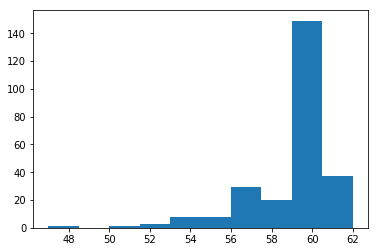

256

In [19]:
# content length histogram
%matplotlib inline
import matplotlib.pyplot as plt

lengths = list(map(lambda x: len(x.split(' ')), df.content.tolist()))
plt.hist(lengths)
plt.show()

len(lengths)